# Hough Lines

### Import resources and display the image

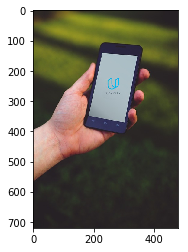

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

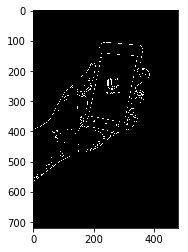

In [5]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100 
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

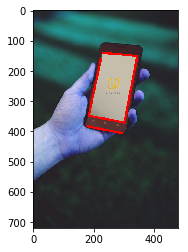

In [22]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
# hough transform은 canny edge로 찾은 점들을 라인으로 만들어주기 위함
rho = 1                 # detection의 resolution 결정
theta = np.pi/180       # detection의 resolution 결정
threshold = 60          # 라인을 찾기위한 최소 threshold (hough space에서 최소 60개의 라인이 cross되야 라인으로 생각하겠다...)
min_line_length = 100    # 최소 라인 길이
max_line_gap = 5        # 라인 사이 gap 최소값

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

line_image = np.copy(image_copy)

# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
                                          # (color), size
        
plt.imshow(line_image)